In [2]:
from emerald.quantum.msc_unperturbed import MsC_hamiltonian, MsC_eigstates
from emerald.quantum.coupling_utils import interaction_matrix, wavefunction_stationary_evolution, braket, expansion_coefficients, wavefunction_evolution
from emerald.potentials.coulomb_potential import C_energy_levels

In [3]:
import numpy as np

In [3]:
position_grid = np.linspace(-2, 1000, 5001)

In [79]:
sigma = 1
mu = 50
gaussian_wavefunc = np.sqrt((2*np.pi*sigma**2)**(-1/2)*np.exp( -((position_grid-mu)**2)/(2*sigma**2) ))
print(np.sum(gaussian_wavefunc)*(position_grid[1]-position_grid[0]))

2.2390302698404945


In [6]:
H_0, position_grid = MsC_hamiltonian(0.5, position_grid)

In [7]:
msc_energies, msc_states = MsC_eigstates(H_0, position_grid, 200)

In [39]:
np.sum(msc_energies<0)

np.int64(28)

In [9]:
selected_energies, selected_states = msc_energies[:200], msc_states[:, :200]

In [10]:
Xi_vectors, Xi_values, Xi_inv = interaction_matrix(position_grid, selected_states)

In [19]:
print(Xi_vectors.max())

0.8094777864112178


In [9]:
coefficients = braket(position_grid, selected_states, gaussian_wavefunc)
print(coefficients)

[[-5.47163871e-11 -2.55429325e-09 -4.95828247e-08 ... -3.07862634e-08
  -4.50616103e-10 -3.30285399e-08]
 [ 5.64406684e-12  6.05797820e-10  2.27442865e-08 ...  1.63921943e-08
   3.08971130e-10  1.69806822e-08]
 [ 1.15432912e-12  2.41192614e-10  1.20911925e-08 ...  9.07536245e-09
   1.97560722e-10  9.30324942e-09]
 ...
 [ 2.16098417e-03 -1.58137468e-02 -3.43350742e-03 ... -1.19745025e-01
  -9.20519123e-02 -5.62243742e-02]
 [ 2.19552550e-03 -1.58955745e-02 -3.45361964e-03 ... -1.20125293e-01
  -9.24393100e-02 -5.65254031e-02]
 [ 2.23047033e-03 -1.59779653e-02 -3.47552774e-03 ... -1.20502503e-01
  -9.28258910e-02 -5.68270638e-02]]


In [9]:
coefficients = braket(position_grid, selected_states, gaussian_wavefunc)
print(coefficients)

[[-9.77524801e-08 -1.00378251e-07 -1.03071874e-07 ... -2.85255865e-07
  -2.78084650e-07 -2.71086666e-07]
 [-1.33092618e-07 -1.36667676e-07 -1.40335115e-07 ... -3.88383495e-07
  -3.78619694e-07 -3.69091751e-07]
 [ 1.76154701e-07  1.80886468e-07  1.85740506e-07 ...  5.14044878e-07
   5.01122001e-07  4.88511295e-07]
 ...
 [-4.16958820e-09 -4.28158930e-09 -4.39648456e-09 ... -1.21674610e-08
  -1.18615760e-08 -1.15630802e-08]
 [ 1.14890887e-09  1.17977021e-09  1.21142902e-09 ...  3.35268215e-09
   3.26839710e-09  3.18614808e-09]
 [-4.14543435e-09 -4.25678664e-09 -4.37101633e-09 ... -1.20969766e-08
  -1.17928636e-08 -1.14960968e-08]]


In [65]:
coefficients = expansion_coefficients(position_grid, selected_states, gaussian_wavefunc)
print(coefficients)

[-2.26965065e-07  2.34874482e-07 -1.55099031e-05  5.09266650e-03
  8.86937231e-02  1.88681854e-01  7.12177353e-02 -4.63733126e-03
 -2.29589297e-02  3.29405298e-02 -3.54496828e-02 -3.48492804e-02
  3.30220606e-02  3.07926917e-02  2.85226490e-02  2.63650175e-02
  2.43774038e-02  2.25735925e-02 -2.09477739e-02  1.94890753e-02
 -1.82712016e-02  1.79664602e-02  1.90439165e-02  2.05130891e-02
 -2.17805037e-02  2.29295141e-02 -2.38997516e-02 -2.48332113e-02
  2.56097744e-02 -2.63800013e-02  2.69851011e-02  2.75954510e-02
 -2.80211864e-02  2.84562285e-02  2.86819530e-02 -2.89178957e-02
  2.89172093e-02 -2.89268898e-02 -2.86715649e-02  2.84277079e-02
 -2.78905734e-02  2.73684449e-02  2.65258886e-02 -2.57057201e-02
  2.45400171e-02  2.34093028e-02 -2.19108110e-02  2.04664724e-02
 -1.86356482e-02 -1.68859935e-02  1.47351350e-02 -1.27015184e-02
 -1.02561195e-02  7.97418109e-03 -5.27376903e-03 -2.79413974e-03
 -1.07538770e-04  2.71917041e-03 -5.75473996e-03 -8.41827904e-03
  1.15082129e-02 -1.41305

In [50]:
print(msc_energies.shape)
print(msc_states.shape)
print(Xi_values.shape)
print(Xi_vectors.shape)


(5001,)
(5001, 5001)
(200,)
(200, 200)


In [66]:
time_grid = np.linspace(0, 100, 1000)
delta_t = time_grid[1] - time_grid[0]

In [28]:
initial_state = np.zeros(200)
initial_state[0] = 1

In [67]:
initial_state = coefficients

In [70]:
print(initial_state)

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]


In [68]:
unperturbed_history = wavefunction_stationary_evolution(time_grid, selected_energies, initial_state)

100%|██████████| 999/999 [00:00<00:00, 266767.03it/s]


In [15]:
from emerald.utils import external_field

In [60]:
N = len(initial_state)
N_T = len(time_grid)
delta_t = time_grid[1] - time_grid[0]

wavefunc_history = np.empty( (N, N_T), dtype=np.complex128 )
wavefunc_history[:, 0] = initial_state.astype(np.complex128)

exp_H0 = np.exp( -1j*selected_energies*delta_t/2 )

temp_wavefunc = np.empty(N, dtype=np.complex128)


t = time_grid[1]
exp_Xi = np.exp( -1j*external_field(1, 1, t + delta_t/2)*Xi_values*delta_t)
    
temp_wavefunc = exp_H0*wavefunc_history[:, 1-1] #multiplicação pela exp(H0)

print(temp_wavefunc)

temp_wavefunc_2 = Xi_inv@temp_wavefunc #multiplicação pela inversa dos autovetores de Xi 

print(temp_wavefunc_2)

temp_wavefunc_2 *= exp_Xi #multiplicação pelo exponencial da Xi diagonalizada

print(temp_wavefunc_2)

temp_wavefunc_3 = Xi_vectors@temp_wavefunc_2 #multiplicação pelos autovetores de Xi

print(temp_wavefunc_3)

temp_wavefunc_3 *= exp_H0

print(temp_wavefunc_3)


[0.99999964+0.00084791j 0.        +0.j         0.        +0.j
 0.        +0.j         0.        +0.j         0.        +0.j
 0.        +0.j         0.        +0.j         0.        +0.j
 0.        +0.j         0.        +0.j         0.        +0.j
 0.        +0.j         0.        +0.j         0.        +0.j
 0.        +0.j         0.        +0.j         0.        +0.j
 0.        +0.j         0.        +0.j         0.        +0.j
 0.        +0.j         0.        +0.j         0.        +0.j
 0.        +0.j         0.        +0.j         0.        +0.j
 0.        +0.j         0.        +0.j         0.        +0.j
 0.        +0.j         0.        +0.j         0.        +0.j
 0.        +0.j         0.        +0.j         0.        +0.j
 0.        +0.j         0.        +0.j         0.        +0.j
 0.        +0.j         0.        +0.j         0.        +0.j
 0.        +0.j         0.        +0.j         0.        +0.j
 0.        +0.j         0.        +0.j         0.        +0.j
 0.     

In [61]:
print(np.round(np.abs(temp_wavefunc_3), 3))

[1.    0.001 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0

In [69]:
perturbed_history = MsC_wavefunction_evolution(time_grid, selected_energies, initial_state, Xi_values, Xi_vectors, Xi_inv, 0.7, 1)

100%|██████████| 999/999 [00:01<00:00, 634.00it/s]


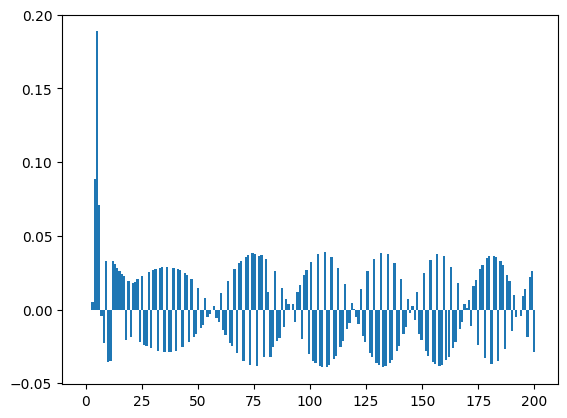

In [70]:
import matplotlib.pyplot as plt

#plt.plot(np.linspace(0, 200, 200), initial_state)
plt.bar(np.linspace(0, 200, 200), initial_state, width=1)
plt.show()

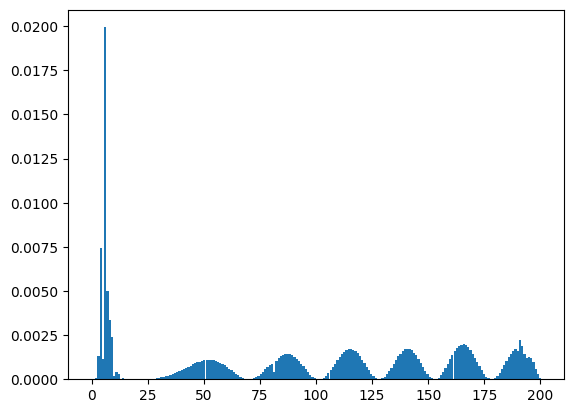

In [71]:
#plt.plot(np.linspace(0, 200, 200), initial_state)
plt.bar(np.linspace(0, 200, 200), np.abs(perturbed_history[:, 354])**2, width=1)
#plt.ylim(0, 1)
plt.show()

In [25]:
import matplotlib.pyplot as plt

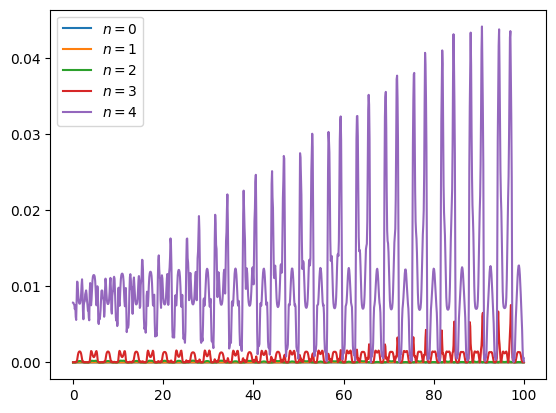

In [72]:
for i in range(0, 5, 1):
    plt.plot(time_grid, np.abs(perturbed_history[i, :])**2, label="$n={}$".format(i))
plt.legend()
plt.show()

In [76]:
wavefunc_history = selected_states@unperturbed_history

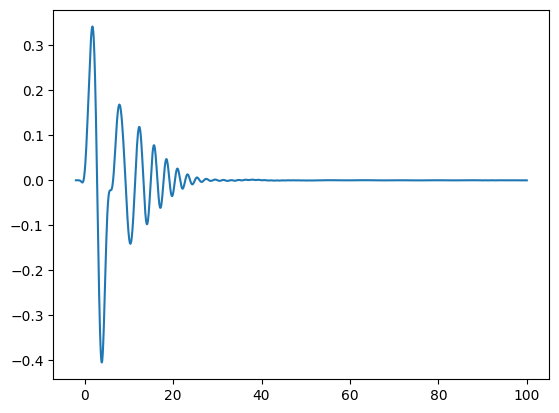

In [101]:
plt.plot(position_grid, wavefunc)

/media/gabriel/AcerD/Documentos/cursos/IC/Morse-Coulomb/emerald/.venv/lib/python3.12/site-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/media/gabriel/AcerD/Documentos/cursos/IC/Morse-Coulomb/emerald/.venv/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


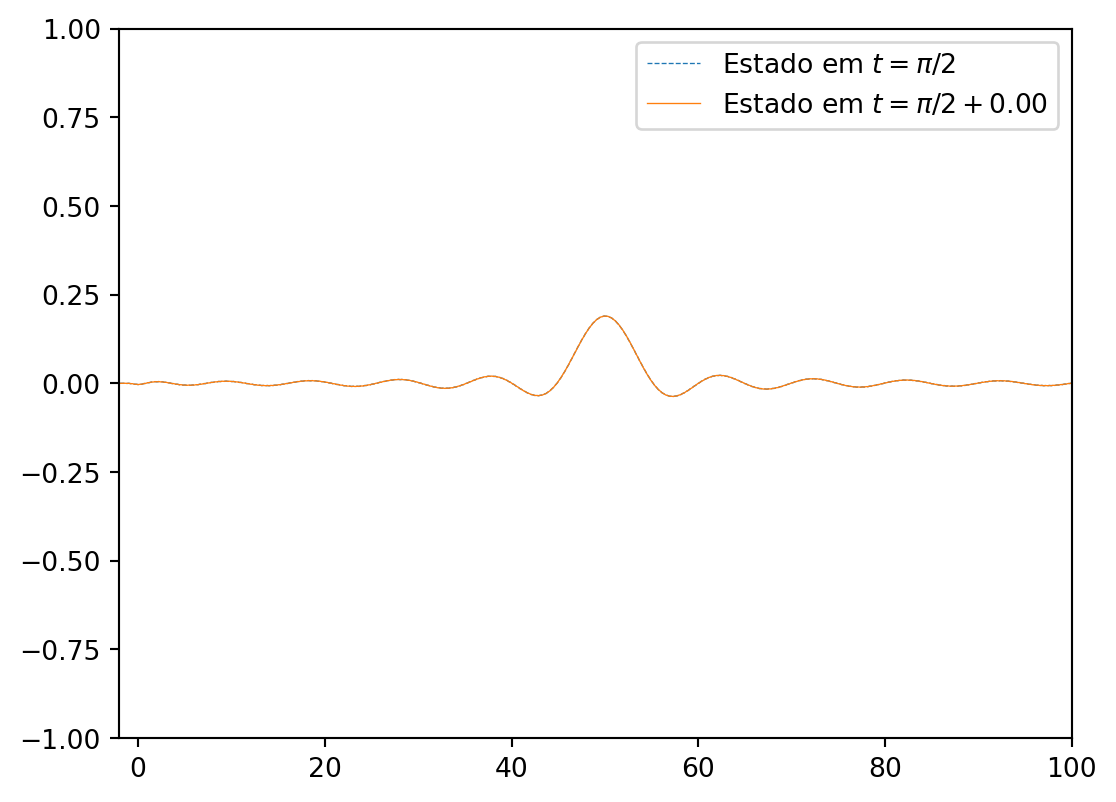

In [77]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()

fig.set_dpi(192)

cv1 = ax.plot(position_grid, wavefunc_history[:, 0], label=r"Estado em $t = \pi/2$", lw=0.5, ls="dashed")
cv2, = ax.plot(position_grid, wavefunc_history[:, 0], label=r"Estado em $t = \pi/2 + 0.00 ~$", lw=0.5)
#cv3 = ax.plot(r_grid, [-Coulomb_eigenfunction(r, 3) for r in r_grid], label=" 1º Estado excitado")

def update(frame):
    cv2.set_ydata(wavefunc_history[:, 5*frame])  
    cv2.set_label(r"Estado em $t = \pi/2 + {:.2f} ~$".format(round(5*frame*delta_t, 2)))
    ax.legend()
    return cv2,

ani = FuncAnimation(fig, update, frames=200, interval=2000, blit=True)
ax.set_xlim(-2, 100)
ax.legend()
ax.set_ylim(-1, 1)
plt.show()



In [78]:
ani.save("gaussian.mp4", writer="ffmpeg", fps=20)

/media/gabriel/AcerD/Documentos/cursos/IC/Morse-Coulomb/emerald/.venv/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


In [79]:
print((np.abs(perturbed_history[:, 10]), 310))

(array([9.90919458e-01, 8.31917822e-02, 3.52629591e-02, 2.12922252e-02,
       1.40788134e-02, 9.87263610e-03, 8.81590999e-03, 9.87213781e-03,
       1.14264956e-02, 1.21328126e-02, 1.26688043e-02, 1.34170600e-02,
       1.38352861e-02, 1.43070375e-02, 1.46029023e-02, 1.49147468e-02,
       1.50986644e-02, 1.52888791e-02, 1.53772475e-02, 1.54690400e-02,
       1.54765765e-02, 1.54873455e-02, 1.54271328e-02, 1.53712120e-02,
       1.52549780e-02, 1.51446788e-02, 1.49829451e-02, 1.48290034e-02,
       1.46311509e-02, 1.44429406e-02, 1.42172478e-02, 1.40029033e-02,
       1.37565831e-02, 1.35230927e-02, 1.32623428e-02, 1.30156335e-02,
       1.27457011e-02, 1.24907245e-02, 1.22159795e-02, 1.19567897e-02,
       1.16807953e-02, 1.14205914e-02, 1.11461242e-02, 1.08871315e-02,
       1.06158826e-02, 1.03581283e-02, 1.00869121e-02, 9.80676268e-03,
       9.23992235e-03, 4.17751784e-03, 9.03974018e-03, 9.05793098e-03,
       8.85774014e-03, 8.62307478e-03, 8.40425089e-03, 8.17296957e-03,
     

In [34]:
for i in range(100):
    print(np.sum(np.abs(wavefunc_history[:, i])))

9.102252066970946
9.11653683069725
9.13266936552745
9.14650700191269
9.158974786487859
9.169764596075634
9.180275531125366
9.191877280339044
9.203747153779888
9.215521166484965
9.22669475540055
9.236972058247796
9.246754791487046
9.256639626506987
9.266802167892648
9.276997460574725
9.287024744723986
9.296677924604442
9.305931231638326
9.315022920730879
9.324126490870885
9.333273810467762
9.34237802740682
9.351304753343214
9.35999867091465
9.36849819164661
9.37692242132396
9.385319970734045
9.393662565069432
9.401923638787538
9.410036862262668
9.41802194005885
9.425898403208343
9.433690630369416
9.441429470194052
9.449096875784559
9.456682774950199
9.464166179632358
9.471534181671522
9.47881332698395
9.486031651069517
9.493195605895325
9.500275539039544
9.507260991316057
9.514163113555579
9.520995764541746
9.527747119173329
9.534427863429006
9.541021790659205
9.547558320897592
9.55404073344155
9.560418017156222
9.56671331266223
9.572942267871943
9.57913162197265
9.585241530821756
9.591

# Coulomb testing

In [4]:
from emerald.quantum.coulomb_unperturbed import C_eigstate

In [5]:
position_grid = np.arange(0, 10000.01, 1.e-2)
print(position_grid)

[0.00000e+00 1.00000e-02 2.00000e-02 ... 9.99998e+03 9.99999e+03
 1.00000e+04]


In [6]:
base_size = 200

In [7]:
coulomb_energies = np.array([ C_energy_levels(n+1) for n in range(base_size) ])

In [8]:
C_eigstate_vec = np.vectorize(C_eigstate)

In [9]:
test = C_eigstate_vec(np.array([1, 2, 3, 4]), np.array([1, 2, 3, 4]))
print(test)

[ 0.73575888  0.         -0.14159686 -0.12262648]


In [10]:
#coulomb_states = np.zeros((len(position_grid), base_size))

coulomb_states = np.array([ C_eigstate(position_grid, n+1) for n in range(base_size) ])

/media/gabriel/AcerD/Documentos/cursos/IC/Morse-Coulomb/emerald/.venv/lib/python3.12/site-packages/scipy/special/_orthogonal.py:667: RuntimeWarning: invalid value encountered in scalar divide
  hn = _gam(n + alpha + 1) / _gam(n + 1)
/media/gabriel/AcerD/Documentos/cursos/IC/Morse-Coulomb/emerald/.venv/lib/python3.12/site-packages/scipy/special/_orthogonal.py:133: RuntimeWarning: invalid value encountered in multiply
  np.poly1d.__init__(self, poly.coeffs * float(kn))
/media/gabriel/AcerD/Documentos/cursos/IC/Morse-Coulomb/emerald/.venv/lib/python3.12/site-packages/scipy/special/_orthogonal.py:119: RuntimeWarning: divide by zero encountered in scalar divide
  equiv_weights = [weights[k] / wfunc(roots[k]) for
/media/gabriel/AcerD/Documentos/cursos/IC/Morse-Coulomb/emerald/.venv/lib/python3.12/site-packages/scipy/special/_orthogonal.py:119: RuntimeWarning: invalid value encountered in scalar divide
  equiv_weights = [weights[k] / wfunc(roots[k]) for


In [11]:
coulomb_states = coulomb_states.T

In [14]:
print(C_eigstate(position_grid, 1))

[0.         0.019801   0.03920795 ... 0.         0.         0.        ]


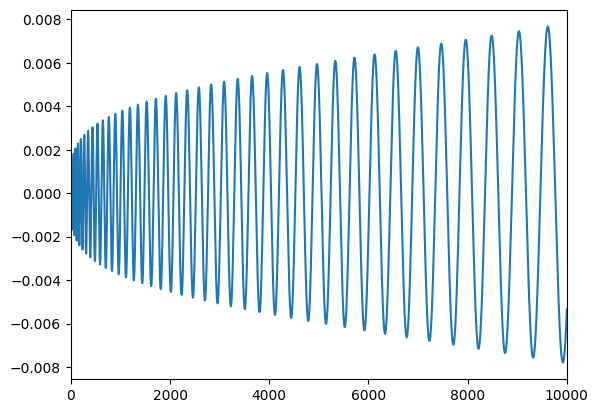

In [53]:
import matplotlib.pyplot as plt
plt.plot(position_grid, coulomb_states[:, 100])
plt.xlim(0, 10000)
plt.show()

In [12]:
Xi_vectors, Xi_values, Xi_inv = interaction_matrix(position_grid, coulomb_states)

In [13]:
initial_state = np.zeros(base_size) ; initial_state[0] = 1

In [14]:
bhor_frequency = C_energy_levels(2)-C_energy_levels(1)

In [15]:
print(bhor_frequency)

0.375


In [25]:
time_grid = np.arange(np.pi/(2*bhor_frequency), np.pi/(2*bhor_frequency) + 1000, 0.01)

In [71]:
unperturbed_history = wavefunction_stationary_evolution(time_grid, coulomb_energies, initial_state)

100%|██████████| 50000/50000 [00:00<00:00, 385888.93it/s]


In [28]:
perturbed_history = wavefunction_evolution(time_grid, coulomb_energies, initial_state, Xi_values, Xi_vectors, Xi_inv, 0.03, bhor_frequency)

  0%|          | 0/99999 [00:00<?, ?it/s]

100%|██████████| 99999/99999 [01:18<00:00, 1276.57it/s]


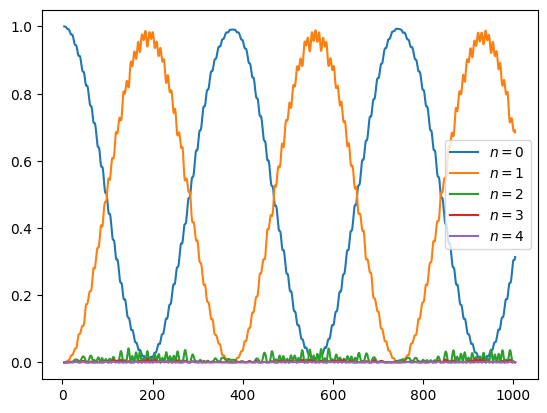

In [29]:
import matplotlib.pyplot as plt

for i in range(0, 5):
    plt.plot(time_grid, np.abs(perturbed_history[i, :])**2, label="$n={}$".format(i))
plt.legend()
plt.show()